#   Gaussian Process

Ransalu Senanayake

### Introduction
Let, 

\begin{equation}
    y_n = f(\mathbf{x}_n) + \epsilon_n 
\end{equation}

where $y_n$ is the $n^{th}$ **observed** output with **noise** $\epsilon_n \sim \mathcal{N}\big(y_n|0, \sigma^2_{obs}\big)$ added to the **noise-free** function $f(\mathbf{x}_n)$ for inputs $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2,...,\mathbf{x}_n,..., \mathbf{x}_N]^\mathsf{T}$  and $\mathbf{x}_n = [x_{n_1}, x_{n_2},...x_{n_q}]$. Therefore,

\begin{equation}
    p\big(y_n|f(\mathbf{x}_n)\big) = \mathcal{N}\big(y_n|f(\mathbf{x}_n), \sigma^2_{obs}\big)
\end{equation}

Since noise is indpendent among data points,

\begin{equation}
    p\big( \mathbf{y}|f(\mathbf{X}) \big) 
    = \prod_{n=1}^{N} \frac{1}{\sqrt{2\pi}\sigma_{obs}} \exp \bigg(- \frac{\big(y_n - f(\mathbf{x}_n)\big)^2}{2\sigma^2_{obs}} \bigg)
    = \frac{1}{\Big(\sqrt{2\pi\sigma_{obs}^2} \Big)^{N/2}} \exp \bigg(- \frac{\| \mathbf{y} - f(\mathbf{X}) \|^2}{2\sigma^2_{obs}} \bigg)
\end{equation}
\begin{equation}
    = \frac{1}{\Big( 2\pi | \sigma_{obs}^2 \mathbf{I}_N |  \Big)^{N/2}} \exp \bigg(- \frac{1}{2} \Big( \mathbf{y} - f(\mathbf{X}) \Big)^\mathsf{T} \Big( \sigma^2_{obs}\mathbf{I}_N \Big)^{-1} \Big( \mathbf{y} - f(\mathbf{X}) \Big)  \bigg)
    =\mathcal{N} \Big( \mathbf{y}|f(\mathbf{X}), \sigma^2_{obs}\mathbf{I}_N \Big)
\end{equation}

**Definition:** *A Gaussian process is a collection of random variables, any finite number of which have a joint Gaussian distribution.* 
$\Box$


Let us consider a Gaussian Process with zero mean and a co-variance function,
\begin{equation}
    k_f(\mathbf{x}_m,\mathbf{x}_n) = \sigma^2_{kern} \exp \bigg(-\frac{ \| \mathbf{x}_m - \mathbf{x}_n \|^2}{2l^2} \bigg)
    \text{ for } m,n=1,2,3,...,N 
\end{equation}

\begin{equation}
    f(\mathbf{X}) \sim \mathcal{GP} (\mathbf{0},\mathbf{K}_f)
\end{equation}

Therefore marginal distribution,
\begin{equation}
    p\big( f(\mathbf{X}) \big)=\mathcal{N} \big( f( \mathbf{X})|\mathbf{0}, \mathbf{K}_f \big)
\end{equation}   

\begin{equation}
    p \big( \mathbf{y} \big)=\int p \big( \mathbf{y}|f(\mathbf{X}) \big) p \big( f(\mathbf{X}) \big) \mathrm{d} f(\mathbf{X}) 
                 = \int \mathcal{N} \Big( \mathbf{y}|\mathbf{I} \cdot f( \mathbf{X}) + \mathbf{0}, \sigma^2_{obs}\mathbf{I}_N \Big) \cdot  \mathcal{N} \Big( f( \mathbf{X})|\mathbf{0}, \mathbf{K}_f \Big)   \mathrm{d} f(\mathbf{X})
\end{equation}   
\begin{equation}                          
                 = \mathcal{N}(f(\mathbf{X})|\mathbf{I} \cdot \mathbf{0} + \mathbf{0}, \sigma^2_{obs}\mathbf{I}_N + \mathbf{I} \mathbf{K}_f \mathbf{I}^\mathsf{T})
                 = \mathcal{N}(f(\mathbf{X})|\mathbf{0}, \mathbf{K}_y)
                 = \frac{1}{\big( 2\pi \big)^{N/2} | \mathbf{K}_f |^{1/2}} \exp \Big(- \frac{1}{2} \mathbf{y} ^\mathsf{T} \mathbf{K}_f^{-1} \mathbf{y} )  \Big)
\end{equation} 

where $\mathbf{K}_y = \mathbf{K}_f + \sigma^2_{obs} \mathbf{I}_N$.

### Learning hyperparameters 

\begin{equation}
    \log p(\mathbf{y}|\mathbf{X},\mathbf{\theta}) = -\frac{1}{2}  \mathbf{y}^\mathsf{T}  \mathbf{K}^{-1}_y \mathbf{y}
                                                    -\frac{1}{2} \log|\mathbf{K}_y|
                                                    -\frac{N}{2} \log(2\pi)
\end{equation}

\begin{equation}
    \frac{\partial}{\partial \mathbf{\theta}_i} \log p(\mathbf{y}|\mathbf{X},\mathbf{\theta}) 
        =-\frac{1}{2}  \mathbf{y}^\mathsf{T}  \frac{\partial \mathbf{K}^{-1}_y}{\partial \mathbf{\theta}_i} \mathbf{y}
        -\frac{1}{2} \frac{\partial}{\partial \mathbf{\theta}_i} \log|\mathbf{K}_y|
        = +\frac{1}{2}  \mathbf{y}^\mathsf{T} \mathbf{K}^{-1}_y \frac{\partial \mathbf{K}_y}{\partial \mathbf{\theta}_i} \mathbf{K}^{-1}_y \mathbf{y} - \frac{1}{2} \mathrm{Tr} \bigg( \mathbf{K}^{-1}_y \frac{\partial \mathbf{K}_y}{\partial \mathbf{\theta}_i} \bigg)
        = \frac{1}{2} \mathrm{Tr}\bigg( \big( \mathbf{\alpha} \mathbf{\alpha}^\mathsf{T} - \mathbf{K}^{-1}_y \big) \frac{\partial \mathbf{K}_y}{\partial \mathbf{\theta}_i} \bigg)
\end{equation}

Let us consider $\theta=[\sigma^2_{obs}, \sigma^2_{kern}, l]$

\begin{equation}
    \frac{\partial \mathbf{K}_y }{ \partial \sigma^2_{obs} } = \mathbf{I}_N
\end{equation}

\begin{equation}
    \frac{\partial \mathbf{K}_y }{ \partial \sigma^2_{kern} } =  \Bigg[ \exp \bigg(-\frac{ \| \mathbf{x}_m - \mathbf{x}_n \|^2}{2l^2} \bigg) \Bigg]_{N \times N}
    \text{ for } m,n=1,2,3,...,N 
\end{equation}

\begin{equation}
    \frac{\partial \mathbf{K}_y }{ \partial l } = \mathbf{K}_f \circ \Bigg[ -\frac{ \| \mathbf{x}_m - \mathbf{x}_n \|^2}{2} \cdot \frac{-2}{l^3} \Bigg]_{N \times N}  
    \text{ for } m,n=1,2,3,...,N 
\end{equation}

### Prediction
For a query point $ \mathbf{x}_* $,

\begin{equation}
    \mathsf{mean}({\mathbf{x}_*}) = \mathbf{k}^{\mathsf T}_f \mathbf{K}^{-1}_y \mathbf{y}
\end{equation} 

\begin{equation}
    \mathsf{var}({\mathbf{x}_*}) = k_y(\mathbf{x}_*,\mathbf{x}_*) - \mathbf{k}^{\mathsf T}_f \mathbf{K}^{-1}_y \mathbf{k}_f
\end{equation} 

where $ \mathbf{k}_f = k_f(\mathbf{x}_n,\mathbf{x}_*) $ for $ n=1,2,...,N $

Note that $ \mathbf{K}_{y_*} $ is given by,

\begin{bmatrix}
    \mathbf{K}_y  &  \mathbf{k}_f  \\
    \mathbf{k}^{\mathsf T}_f & k_y(\mathbf{x}_*,\mathbf{x}_*)
\end{bmatrix}

 
 #### Note on Cholesky Decomposition
Cholesky Decomposition is more numerically stable. If $\mathbf{K}$ is a Hermitian and positive semi definite (psd) matrix, it can be factorised as $ \mathbf{L} \mathbf{L}^\dagger = \mathbf{U}^\dagger \mathbf{U}$ where $ \mathbf{L} $ is a lower triangular matrix, $ \mathbf{U} $ is an upper triangular matrix and $ {}^\dagger $ are their conjugate transposes. In this instance, $ \mathbf{L}^\dagger = \mathbf{L}^\mathsf{T} $ since all elements are $\mathbb R $ and psd because of properties of $ k_f $.
\begin{equation}
    \mathbf{K} = \mathbf{L} \mathbf{L}^{\mathsf T} \Rightarrow
    \mathbf{K}^{-1} = \mathbf{L}^{-\mathsf T} \mathbf{L}^{-1}
\end{equation}

E.g. 

\begin{equation}
    \mathbf{K}^{-1} \mathbf{y} = ( \mathbf{L}^{-\mathsf T} \mathbf{L}^{-1}) \mathbf{y} 
                               = \mathbf{L}^{-\mathsf T} (\mathbf{L}^{-1} \mathbf{y} )
                               = \mathbf{L}^{-\mathsf T} (\mathbf{L} \setminus \mathbf{y} )
                               = \mathbf{L}^{\mathsf T} \setminus \mathbf{L} \setminus \mathbf{y} 
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import math
from scipy import optimize
%matplotlib inline

In [2]:
#Hyperparameter Optimisation

def func(x, *args): ## this is the function
    obs_noise_var = x[0]
    RBF_noise_var = x[1] 
    RBF_L = x[2]
    
    #Large covar matrix K_f
    k_nn_temp = np.array(np.eye(N))
    for i in range(N):
        for j in range(i,N):
            norm = np.linalg.norm(X[i,:]-X[j,:],2)**2
            k_nn_temp[i,j] = np.exp(-0.5*norm/(RBF_L**2)) 
            k_nn_temp[j,i] = k_nn_temp[i,j]    
    k_nn = RBF_noise_var*k_nn_temp + obs_noise_var*np.array(np.eye(N)) #Large covar matrix K_y
    
    EL = np.linalg.cholesky(k_nn)
    alpha = np.linalg.solve(EL.T,np.linalg.solve(EL,y)) 
    neg_log_marg_lik_new = 0.5*y.T.dot(alpha) + np.trace(np.log(EL)) +0.5*N*np.log(2*np.pi)  
          
    return neg_log_marg_lik_new[0][0]


def fprime(x, *args): ## this is the derivative
    obs_noise_var = x[0]
    RBF_noise_var = x[1] 
    RBF_L = x[2]
    
    #Large covar matrix K_f
    k_nn_temp2 = np.array(np.eye(N))
    for i in range(N):
        for j in range(i,N):
            k_nn_temp2[i,j] = -0.5*(np.linalg.norm(X[i,:]-X[j,:],2))**2
            k_nn_temp2[j,i] = k_nn_temp2[i,j]
    k_nn_temp = np.exp(k_nn_temp2/(RBF_L**2)) 
    
    k_nn = RBF_noise_var*k_nn_temp + obs_noise_var*np.array(np.eye(N)) #Large covar matrix K_y   

    EL = np.linalg.cholesky(k_nn)
    alpha = np.linalg.solve(EL.T,np.linalg.solve(EL,y)) 
    eta = -alpha.dot(alpha.T) + np.linalg.solve(EL.T,np.linalg.solve(EL,np.array(np.eye(N))))
        
    gradK_obs_noise_var = np.array(np.eye(N))
    gradK_RBF_noise_var = k_nn_temp
    gradK_RBF_L = (-2*(RBF_L**-3))*RBF_noise_var*k_nn_temp*k_nn_temp2
    
    g_obs_noise_var = 0.5*np.trace(eta.dot(gradK_obs_noise_var))
    g_RBF_noise_var = 0.5*np.trace(eta.dot(gradK_RBF_noise_var))
    g_RBF_L = 0.5*np.trace(eta.dot(gradK_RBF_L))
    
    return np.array([  g_obs_noise_var,   g_RBF_noise_var, g_RBF_L])


In [7]:
#Query
def GP_reg_predict(X,y,hyperpara,x_q):
    obs_noise_var_q = hyperpara[0]
    RBF_noise_var_q = hyperpara[1]
    RBF_L_q = hyperpara[2]

    #large Covar matrix K_y
    k_nn = np.array(np.eye(N))
    for i in range(N):
        for j in range(i,N):
            norm = np.linalg.norm(X[i,:]-X[j,:],2)**2
            k_nn[i,j] = RBF_noise_var_q*np.exp(-0.5*norm/(RBF_L_q**2)) 
            k_nn[j,i] = k_nn[i,j]
    k_nn = k_nn + obs_noise_var_q*np.array(np.eye(N))
    
    #small Covar matrix - Note: this piece of code can be incorporated into the large matrix for efficiency
    k_nnp1 = np.array(np.zeros([N,1]))
    for i in range(N):
        norm_nm = np.linalg.norm(X[i,:]-x_q,2)**2
        k_nnp1[i,0] = RBF_noise_var_q*np.exp(-0.5*norm_nm/(RBF_L_q**2)) 
    print(k_nnp1)
     
    
    #Cholesky is numerically stable
    EL = np.linalg.cholesky(k_nn)
    alpha = np.linalg.solve(EL.T,np.linalg.solve(EL,y)) 
    log_marg_lik = -0.5*y.T.dot(alpha) -np.sum(np.log(np.diag(EL))) -0.5*N*np.log(2*np.pi)  
    f_mean = k_nnp1.T.dot(alpha)
    v = np.linalg.solve(EL,k_nnp1)
    f_var = (obs_noise_var_q+RBF_noise_var_q)*np.exp(-0) - v.T.dot(v)
    
    ########Normal matrix inversion
    #k_nn_inv = np.linalg.pinv(k_nn)
    #k_nn_det = np.linalg.det(k_nn)
    #log_marg_lik_old = -0.5*y.T.dot(k_nn_inv.dot(y)) -0.5*np.log(k_nn_det) -0.5*N*np.log(2*np.pi)    
    #f_mean_old = k_nnp1.T.dot(k_nn_inv.dot(y))
    #c = (obs_noise_var_q+RBF_noise_var_q)*np.exp(-0)
    #f_var_old = c - k_nnp1.T.dot(k_nn_inv.dot(k_nnp1))
    
    return f_mean, f_var, log_marg_lik

### Example 1

In [8]:
#Generating a Data Set
N=10
X = np.linspace(0.05,0.95,N)[:,np.newaxis]
#noise = np.array([0.01,-0.02,0.01,0.3,0.08,-0.11,-0.036,0.21,-0.0011,0.15])[:,None] #np.rand.randn
y = -np.cos(np.pi*X) + np.sin(4*np.pi*X) #+ noise #Data set by Neil Lawrence - MLSS 2015, Sydney

In [9]:
x0 = np.asarray((1, 1, 1))  #initial guess
bounds = [(1e-6,None),(1e-6,None),(1e-6,None)] #constraints 

hyperpara_q, func_q, dict_q = optimize.fmin_l_bfgs_b(func, x0, fprime=fprime, approx_grad=True, bounds=bounds) ##Learning

obs_noise_var_q = hyperpara_q[0]
RBF_noise_var_q = hyperpara_q[1]
RBF_L_q = hyperpara_q[2]
print("obs_noise_var_q=",obs_noise_var_q, ", RBF_noise_var_q=", RBF_noise_var_q ,   " & RBF_L_q=",RBF_L_q)

import time
t0 = time.clock()
f_mean_q, f_var_q, log_marg_lik_q = GP_reg_predict(X,y,hyperpara_q,np.array([0.6])) ##Prediction
t1 = time.clock()
print(t1-t0)

print("f_mean_q=", f_mean_q[0][0], ", f_var_q=",f_var_q[0][0],   " & log_marg_lik_q=",log_marg_lik_q[0][0])

('obs_noise_var_q=', 9.9999999999999995e-07, ', RBF_noise_var_q=', 6.1760973434261563, ' & RBF_L_q=', 0.22049970385628115)
[[ 0.27522523]
 [ 0.76967675]
 [ 1.75228391]
 [ 3.24770483]
 [ 4.90032183]
 [ 6.01933659]
 [ 6.01933659]
 [ 4.90032183]
 [ 3.24770483]
 [ 1.75228391]]
0.00122044373893
('f_mean_q=', 1.260149821240276, ', f_var_q=', 2.0328098546684714e-06, ' & log_marg_lik_q=', -4.4281221245391897)


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:19: RuntimeWarning: divide by zero encountered in log


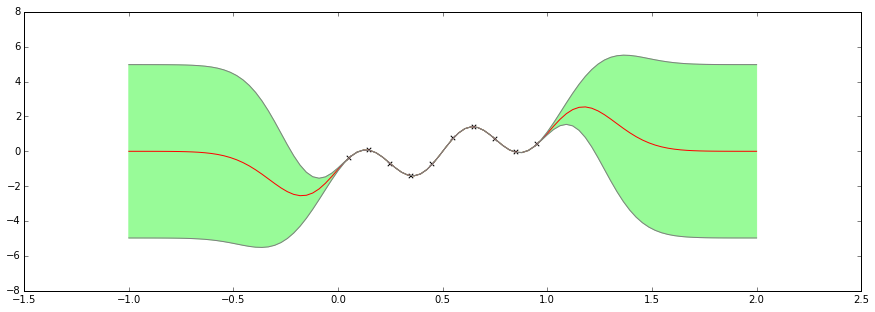

In [6]:
N_q = 100
x_q = np.linspace(-1,2,N_q);
f_mean_q = np.array(np.zeros([1,N_q]))
f_var_q = np.array(np.zeros([1,N_q]))
log_marg_lik_q = np.array(np.zeros([1,N_q]))
for i in range(N_q):
    f_mean_q[0,i], f_var_q[0,i], log_marg_lik_q[0,i] = GP_reg_predict(X,y,hyperpara_q,np.array(x_q[i]))

fig, ax = pl.subplots(figsize=(15,5))
ax.fill_between(x_q,f_mean_q[0,:]-2*np.sqrt(f_var_q[0,:]),f_mean_q[0,:]+2*np.sqrt(f_var_q[0,:]),color='#98FB98')
pl.scatter(X,y,marker='x',color='k')
pl.plot(x_q,f_mean_q[0,:],color='r')
pl.plot(x_q,f_mean_q[0,:]+2*np.sqrt(f_var_q[0,:]),color='0.5')
pl.plot(x_q,f_mean_q[0,:]-2*np.sqrt(f_var_q[0,:]),color='0.5')


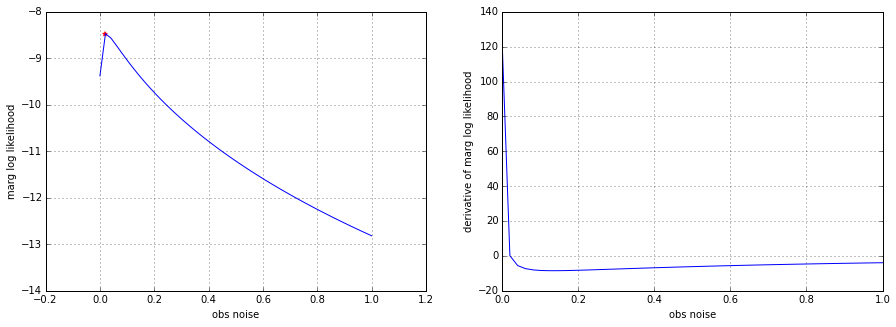

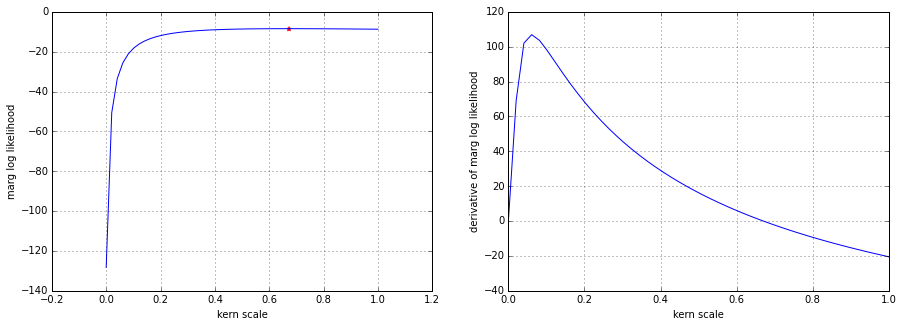

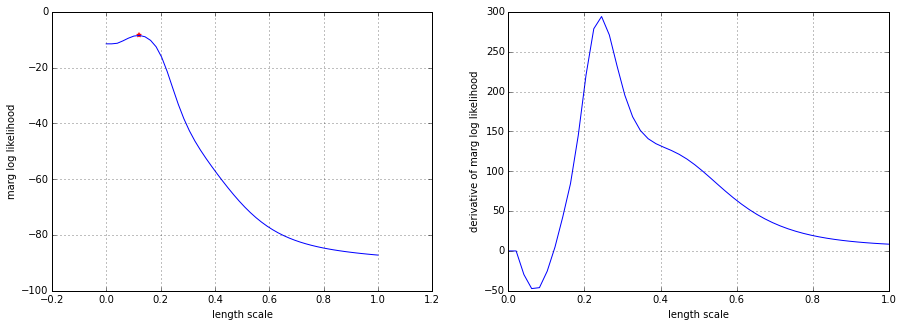

In [18]:
#More details about optimization 
N_opt = 50
x_opt = np.linspace(1e-6,1,N_opt);
log_lik_opt = np.zeros([1,N_opt])
grad_opt = np.zeros([1,N_opt])


for i in range(N_opt):
    log_lik_opt[0,i]=func(np.array([x_opt[i], RBF_noise_var_q, RBF_L_q]))
    a,b,grad_opt[0,i]=fprime(np.array([x_opt[i], RBF_noise_var_q, RBF_L_q]))
fig, ax = pl.subplots(1,2,figsize=(15,5))
ax[0].plot(x_opt,-log_lik_opt[0],color='b')
ax[0].set_xlabel('obs noise')
ax[0].set_ylabel('marg log likelihood')
ax[0].grid()
max_val=np.max(-log_lik_opt)
max_pos=np.argmax(-log_lik_opt)
ax[0].scatter(x_opt[max_pos],max_val,marker='*',color='r')
ax[1].plot(x_opt,grad_opt[0],color='b')
ax[1].set_xlabel('obs noise')
ax[1].set_ylabel('derivative of marg log likelihood')
ax[1].grid()



for i in range(N_opt):
    log_lik_opt[0,i]=func(np.array([obs_noise_var_q, x_opt[i], RBF_L_q]))
    a,b,grad_opt[0,i]=fprime(np.array([obs_noise_var_q, x_opt[i], RBF_L_q]))
fig, ax = pl.subplots(1,2,figsize=(15,5))
ax[0].plot(x_opt,-log_lik_opt[0],color='b')
ax[0].set_xlabel('kern scale')
ax[0].set_ylabel('marg log likelihood')
ax[0].grid()
max_val=np.max(-log_lik_opt)
max_pos=np.argmax(-log_lik_opt)
ax[0].scatter(x_opt[max_pos],max_val,marker='*',color='r')
ax[1].plot(x_opt,grad_opt[0],color='b')
ax[1].set_xlabel('kern scale')
ax[1].set_ylabel('derivative of marg log likelihood')
ax[1].grid()


for i in range(N_opt):
    log_lik_opt[0,i]=func(np.array([obs_noise_var_q, RBF_noise_var_q, x_opt[i]]))
    a,b,grad_opt[0,i]=fprime(np.array([obs_noise_var_q, RBF_noise_var_q, x_opt[i]]))
fig, ax = pl.subplots(1,2,figsize=(15,5))
ax[0].plot(x_opt,-log_lik_opt[0],color='b')
ax[0].set_xlabel('length scale')
ax[0].set_ylabel('marg log likelihood')
ax[0].grid()
max_val=np.max(-log_lik_opt)
max_pos=np.argmax(-log_lik_opt)
ax[0].scatter(x_opt[max_pos],max_val,marker='*',color='r')
ax[1].plot(x_opt,grad_opt[0],color='b')
ax[1].set_xlabel('length scale')
ax[1].set_ylabel('derivative of marg log likelihood')
ax[1].grid()

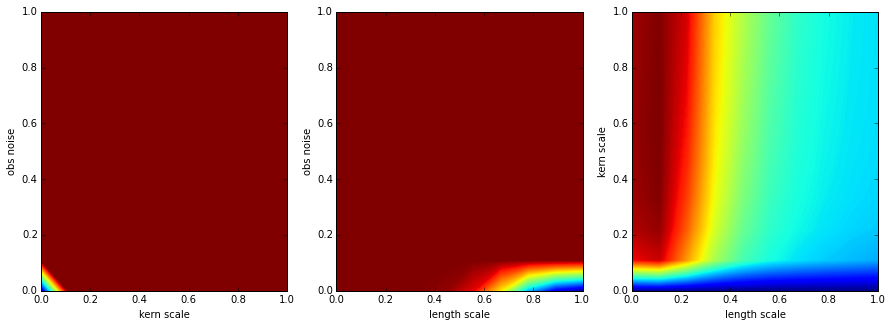

In [19]:
#More details about optimization 
N_opt = 10

x_opt = np.linspace(1e-6,1,N_opt)
one_vs_two = np.ones([N_opt,N_opt])
one_vs_three = np.ones([N_opt,N_opt])
two_vs_three = np.ones([N_opt,N_opt])

for i in range(N_opt):
    for j in range(N_opt):
        one_vs_two[i,j]=-func(np.array([x_opt[i], x_opt[j], RBF_L_q]))
        one_vs_three[i,j]=-func(np.array([x_opt[i],RBF_noise_var_q , x_opt[j]]))
        two_vs_three[i,j]=-func(np.array([obs_noise_var_q, x_opt[i], x_opt[j]]))
        
fig,ax = pl.subplots(1,3,figsize = (5*3,5))
ax[0].contourf(x_opt,x_opt,one_vs_two,500)
ax[0].set_xlabel('kern scale')
ax[0].set_ylabel('obs noise')
ax[1].contourf(x_opt,x_opt,one_vs_three,500)
ax[1].set_xlabel('length scale')
ax[1].set_ylabel('obs noise')
ax[2].contourf(x_opt,x_opt,two_vs_three,500)
ax[2].set_xlabel('length scale')
ax[2].set_ylabel('kern scale')


### Example 2

In [5]:
#Read weather report
import pandas as pd

N=215
X = np.linspace(0,50,N)[:,np.newaxis]
g = pd.read_csv('hourly.csv',delimiter=',').values
y = g[0:N,5][:,None]

In [8]:
x0 = np.asarray((0.5, 0.5, 0.5))  #initial guess
bounds = [(1e-6,None),(1e-6,None),(1e-6,None)] #constraints 

hyperpara_q, func_q, dict_q = optimize.fmin_l_bfgs_b(func, x0, fprime=fprime, approx_grad=False, bounds=bounds) ##Learn

obs_noise_var_q = hyperpara_q[0]
RBF_noise_var_q = hyperpara_q[1]
RBF_L_q = hyperpara_q[2]
print("obs_noise_var_q=",obs_noise_var_q, ", RBF_noise_var_q=", RBF_noise_var_q ,   " & RBF_L_q=",RBF_L_q)

import time
t0 = time.clock()
f_mean_q, f_var_q, log_marg_lik_q = GP_reg_predict(X,y,hyperpara_q,np.array([0.6])) #Predict
t1 = time.clock()
print('time elapsed=',t1-t0)

print("f_mean_q=", f_mean_q[0][0], ", f_var_q=",f_var_q[0][0],   " & log_marg_lik_q=",log_marg_lik_q[0][0]) 

('obs_noise_var_q=', 33.351296295349648, ', RBF_noise_var_q=', 4494.7355596968173, ' & RBF_L_q=', 1.861363209499151)
('time elapsed=', 0.5449629287867879)
('f_mean_q=', 58.847285380183962, ', f_var_q=', 39.960307943447333, ' & log_marg_lik_q=', -776.7719548547326)


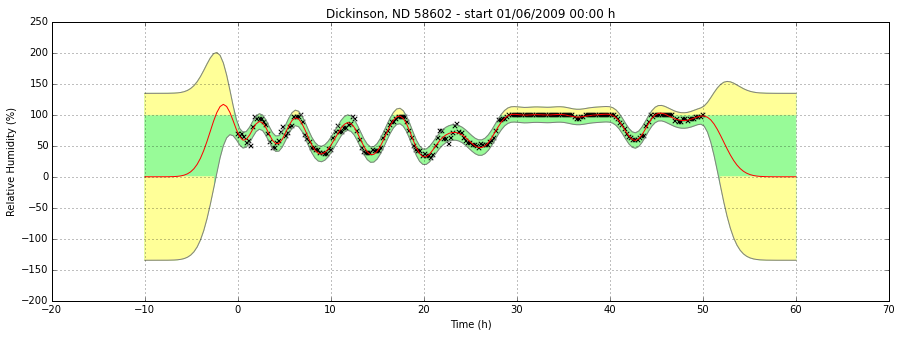

In [7]:
N_q = 200
x_q = np.linspace(-10,60,N_q);
f_mean_q = np.array(np.zeros([1,N_q]))
f_var_q = np.array(np.zeros([1,N_q]))
log_marg_lik_q = np.array(np.zeros([1,N_q]))
for i in range(N_q):
    f_mean_q[0,i], f_var_q[0,i], log_marg_lik_q[0,i] = GP_reg_predict(X,y,hyperpara_q,np.array(x_q[i]))

fig, ax = pl.subplots(figsize=(15,5))
TwoSD_l = f_mean_q[0,:]-2*np.sqrt(f_var_q[0,:])
TwoSD_u = f_mean_q[0,:]+2*np.sqrt(f_var_q[0,:])
ax.fill_between(x_q,TwoSD_l,TwoSD_u, color='#98FB98')
ax.fill_between(x_q,100,TwoSD_u, where=TwoSD_u>100, color='#FFFF98')
ax.fill_between(x_q,0,TwoSD_l, where=TwoSD_l<0, color='#FFFF98')
pl.grid(True)
pl.scatter(X,y,marker='x',color='k')
pl.plot(x_q,f_mean_q[0,:],color='r')
pl.plot(x_q,TwoSD_l,color='0.5')
pl.plot(x_q,TwoSD_u,color='0.5')
pl.title('Dickinson, ND 58602 - start 01/06/2009 00:00 h')
pl.xlabel('Time (h)')
pl.ylabel('Relative Humidity (%)')

#Note: Although 0 =< RH <= 100 is marked in green colour, squashing is not considered in this regression.